<a href="https://colab.research.google.com/github/jacobpad/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/%20LS_DS12_134A_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
# A bunch of imports, yes, it's probably overkill
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df.drop(['diagnosis', 'Unnamed: 32'], axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# Perform K-Means Clustering on the Dataset

In [0]:
# This takes a really long time to run
# sns.pairplot(df)
# plt.show();

In [0]:
# After reading about the columns on the website above and looking at the graphs 
#   directly above, I choose to cluster concave_points_worst & smoothness_worst

In [0]:
cluster = df[['concave points_worst', 'texture_worst']]

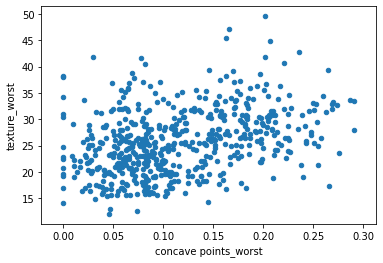

In [7]:
df.plot.scatter(x='concave points_worst', y='texture_worst');

In [0]:
# Standarize it
scaler = StandardScaler()
scaler.fit(cluster)
cluster = pd.DataFrame(scaler.transform(cluster), 
                       columns=['concave_points_worst', 'texture_worst'])

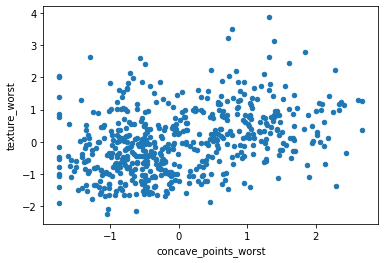

In [9]:
# Plot the standardized cluster
cluster.plot.scatter(x='concave_points_worst', y='texture_worst');

In [0]:
# inertia_float
# Sum of squared distances of samples to their closest cluster center.
ssd = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(cluster)
    ssd.append(km.inertia_)

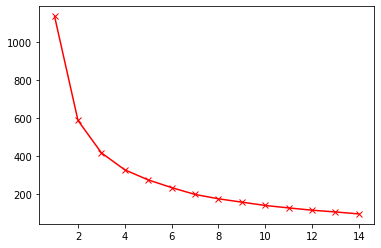

In [11]:
# Pick number of clusters from the elbow test
plt.plot(K, ssd, 'rx-')
plt.show();

In [12]:
# I choose 2 clusters - 2 centroids
kmeans = KMeans(n_clusters=2)
kmeans.fit(cluster)
labels = kmeans.labels_

cluster['clusters'] = pd.Series(labels).values
print(labels)
cluster.head()

[1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0
 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 

,concave_points_worst,texture_worst,clusters
0,2.296076,-1.359293,1
1,1.087084,-0.369203,1
2,1.955000,-0.023974,1
3,2.175786,0.133984,1
4,0.729259,-1.466770,0


In [13]:
cluster

,concave_points_worst,texture_worst,clusters
0,2.296076,-1.359293,1
1,1.087084,-0.369203,1
2,1.955000,-0.023974,1
3,2.175786,0.133984,1
4,0.729259,-1.466770,0
...,...,...,...
564,1.629151,0.117700,1
565,0.733827,2.047399,1
566,0.414069,1.374854,1
567,2.289985,2.237926,1


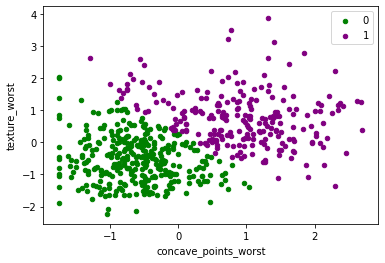

In [14]:
# Plot the work
colors = {0: 'green', 1: 'purple'}
fig, ax = plt.subplots()
grouped = cluster.groupby('clusters')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x='concave_points_worst', 
               y='texture_worst', label=key, color=colors[key]);

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here

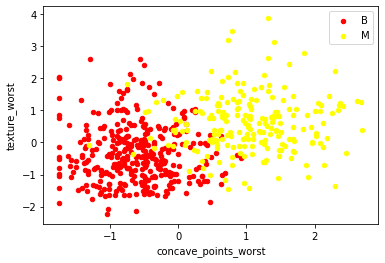

In [16]:
cluster['diagnosis'] = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")['diagnosis']
colors = {'M': 'yellow', 'B': 'red'}
fig, ax = plt.subplots()
grouped = cluster.groupby('diagnosis')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x='concave_points_worst', 
               y='texture_worst', label=key, color=colors[key]);

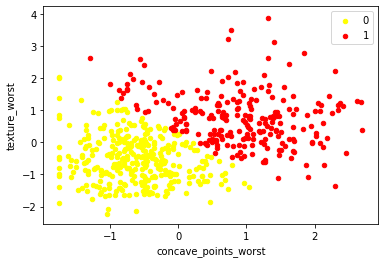

In [17]:
# ??????????????????????????????????????????????????????????????????????????????
# ??????????????????????????????????????????????????????????????????????????????
# Why did they flip
# ??????????????????????????????????????????????????????????????????????????????
# ??????????????????????????????????????????????????????????????????????????????
colors = {0: 'yellow', 1: 'red'}
fig, ax = plt.subplots()
grouped = cluster.groupby('clusters')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x='concave_points_worst', 
               y='texture_worst', label=key, color=colors[key])

In [18]:
# %age
cluster.diagnosis = cluster.diagnosis.map({'M': 1, 'B': 0})
print(((cluster.diagnosis==cluster.clusters).sum() / 
       len(cluster.diagnosis)) * 100, '%', sep='')

88.75219683655537%


## 88.75219683655537%

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####

In [20]:
scaler = StandardScaler()
df2 = scaler.fit_transform(cluster)
df2 = pd.DataFrame(data=df2)
df2 = np.array(df2)
df2[0]

array([ 2.29607613, -1.35929347,  1.20523284,  1.29767572])

In [21]:
# .9 - It is able to stop the PCA after 90%
pca = PCA(.9)
transformed_data = pca.fit_transform(cluster)
transformed_data

array([[ 1.09937007, -2.5721951 ],
       [ 0.89016262, -1.06625643],
       [ 1.67014494, -1.32912542],
       ...,
       [ 1.48514426,  0.69635653],
       [ 3.2407157 ,  0.2187631 ],
       [-0.9496845 ,  1.72878791]])

In [22]:
pca.explained_variance_ratio_

array([0.68227167, 0.26665864])

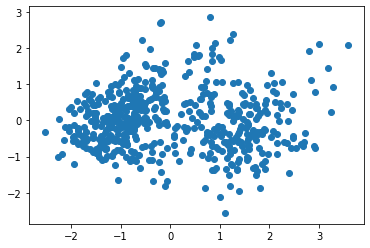

In [23]:
# Plot
plt.scatter(transformed_data[:,0:1], transformed_data[:,1:2]);

In [24]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(transformed_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [0]:
# fig, ax = plt.subplots()
# fig.set_size_inches(15,10)
# pc1 = pca.components_[0]
# pc2 = pca.components_[1]
# ax = plt.scatter(pc1, pc2)

In [26]:
# Reimport as df2
df2 = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
df2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [27]:
df2['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [28]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [29]:
accuracy_df = pd.DataFrame({'diagnosis': df2['diagnosis'], 'label': kmeans.labels_})
accuracy_df.head()

,diagnosis,label
0,M,1
1,M,1
2,M,1
3,M,1
4,M,0


In [30]:
# Replace B & M
df2['diagnosis'] = df2['diagnosis'].replace({"B": 0, "M": 1})
df2['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [31]:
accuracy_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [32]:
# Replace the most common category with 0, the second most common with 1

accuracy_df['diagnosis'] = accuracy_df['diagnosis'].replace({"B": 0, "M": 1})

accuracy_df

,diagnosis,label
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
564,1,1
565,1,1
566,1,1
567,1,1


In [33]:
# Percentage Accuracy
(accuracy_df['diagnosis'] == accuracy_df['label']).value_counts()[1]/len(accuracy_df)

0.8892794376098418

## 88.92794376098418%

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project